In [20]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression  # Linear Regression used for classification in this context
from sklearn.svm import SVC  # Support Vector Machine
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors
from sklearn.ensemble import RandomForestClassifier  # Random Forest Classifier
from sklearn.preprocessing import StandardScaler
import time

# Load the MNIST dataset using TensorFlow
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Preprocess data (Flatten for ML models, Normalize and reshape for CNN)
x_train_flat = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test_flat = x_test.reshape(x_test.shape[0], -1) / 255.0

# Normalize for KNN and Random Forest
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_flat)
x_test_scaled = scaler.transform(x_test_flat)

# One-hot encode labels for CNN
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Step 4: Split data into training and validation set
x_train_sub, x_val_sub, y_train_sub, y_val_sub = train_test_split(x_train_flat, y_train, test_size=0.1, random_state=42)

metrics = {
    'ANN': {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'conf_matrix': []},
    'CNN': {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'conf_matrix': []},
    'Logistic Regression': {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'conf_matrix': []},
    'SVM': {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'conf_matrix': []},
    'KNN': {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'conf_matrix': []},
    'Random Forest': {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'conf_matrix': []},
}

In [7]:
# Train and evaluate Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
start_time = time.time()
lr_model.fit(x_train_flat, y_train)
lr_training_time = time.time() - start_time

# Evaluate Logistic Regression model
y_pred_lr = lr_model.predict(x_test_flat)
metrics['Logistic Regression']['accuracy'] = accuracy_score(y_test, y_pred_lr)
metrics['Logistic Regression']['precision'] = precision_score(y_test, y_pred_lr, average='weighted')
metrics['Logistic Regression']['recall'] = recall_score(y_test, y_pred_lr, average='weighted')
metrics['Logistic Regression']['f1'] = f1_score(y_test, y_pred_lr, average='weighted')
metrics['Logistic Regression']['conf_matrix'] = confusion_matrix(y_test, y_pred_lr)

# Train and evaluate SVM
svm_model = SVC()
start_time = time.time()
svm_model.fit(x_train_flat, y_train)
svm_training_time = time.time() - start_time

# Evaluate SVM model
y_pred_svm = svm_model.predict(x_test_flat)
metrics['SVM']['accuracy'] = accuracy_score(y_test, y_pred_svm)
metrics['SVM']['precision'] = precision_score(y_test, y_pred_svm, average='weighted')
metrics['SVM']['recall'] = recall_score(y_test, y_pred_svm, average='weighted')
metrics['SVM']['f1'] = f1_score(y_test, y_pred_svm, average='weighted')
metrics['SVM']['conf_matrix'] = confusion_matrix(y_test, y_pred_svm)

# Train and evaluate KNN
knn_model = KNeighborsClassifier()
start_time = time.time()
knn_model.fit(x_train_flat, y_train)
knn_training_time = time.time() - start_time

# Evaluate KNN model
y_pred_knn = knn_model.predict(x_test_flat)
metrics['KNN']['accuracy'] = accuracy_score(y_test, y_pred_knn)
metrics['KNN']['precision'] = precision_score(y_test, y_pred_knn, average='weighted')
metrics['KNN']['recall'] = recall_score(y_test, y_pred_knn, average='weighted')
metrics['KNN']['f1'] = f1_score(y_test, y_pred_knn, average='weighted')
metrics['KNN']['conf_matrix'] = confusion_matrix(y_test, y_pred_knn)

# Train and evaluate Random Forest
rf_model = RandomForestClassifier()
start_time = time.time()
rf_model.fit(x_train_flat, y_train)
rf_training_time = time.time() - start_time

# Evaluate Random Forest model
y_pred_rf = rf_model.predict(x_test_flat)
metrics['Random Forest']['accuracy'] = accuracy_score(y_test, y_pred_rf)
metrics['Random Forest']['precision'] = precision_score(y_test, y_pred_rf, average='weighted')
metrics['Random Forest']['recall'] = recall_score(y_test, y_pred_rf, average='weighted')
metrics['Random Forest']['f1'] = f1_score(y_test, y_pred_rf, average='weighted')
metrics['Random Forest']['conf_matrix'] = confusion_matrix(y_test, y_pred_rf)

In [8]:
# Function to build and train ANN
def build_train_ann():
    model = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=(784,)),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Function to build and train CNN
def build_train_cnn():
    model = models.Sequential([
        layers.Reshape((28, 28, 1), input_shape=(28, 28)),  # Reshaping to 28x28x1 for CNN
        layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Train and evaluate ANN
ann_model = build_train_ann()
start_time = time.time()
ann_history = ann_model.fit(x_train_flat, y_train, epochs=5, batch_size=32, validation_data=(x_test_flat, y_test))
ann_training_time = time.time() - start_time

# Evaluate ANN model
ann_test_loss, ann_test_accuracy = ann_model.evaluate(x_test_flat, y_test)
y_pred_ann = np.argmax(ann_model.predict(x_test_flat), axis=1)

# Store metrics for ANN
metrics['ANN']['accuracy'] = ann_test_accuracy
metrics['ANN']['precision'] = precision_score(y_test, y_pred_ann, average='weighted')
metrics['ANN']['recall'] = recall_score(y_test, y_pred_ann, average='weighted')
metrics['ANN']['f1'] = f1_score(y_test, y_pred_ann, average='weighted')
metrics['ANN']['conf_matrix'] = confusion_matrix(y_test, y_pred_ann)

# Train and evaluate CNN
cnn_model = build_train_cnn()
start_time = time.time()
cnn_history = cnn_model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))
cnn_training_time = time.time() - start_time

# Evaluate CNN model
cnn_test_loss, cnn_test_accuracy = cnn_model.evaluate(x_test, y_test)
y_pred_cnn = np.argmax(cnn_model.predict(x_test), axis=1)

# Store metrics for CNN
metrics['CNN']['accuracy'] = cnn_test_accuracy
metrics['CNN']['precision'] = precision_score(y_test, y_pred_cnn, average='weighted')
metrics['CNN']['recall'] = recall_score(y_test, y_pred_cnn, average='weighted')
metrics['CNN']['f1'] = f1_score(y_test, y_pred_cnn, average='weighted')
metrics['CNN']['conf_matrix'] = confusion_matrix(y_test, y_pred_cnn)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8747 - loss: 0.4317 - val_accuracy: 0.9633 - val_loss: 0.1190
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9676 - loss: 0.1077 - val_accuracy: 0.9716 - val_loss: 0.0894
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9775 - loss: 0.0730 - val_accuracy: 0.9756 - val_loss: 0.0767
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9835 - loss: 0.0527 - val_accuracy: 0.9736 - val_loss: 0.0827
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9879 - loss: 0.0405 - val_accuracy: 0.9769 - val_loss: 0.0843
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9721 - loss: 0.1007
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 30ms/step - accuracy: 0.9118 - loss: 0.7392 - val_accuracy: 0.9765 - val_loss: 0.0755
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 32ms/step - accuracy: 0.9819 - loss: 0.0591 - val_accuracy: 0.9755 - val_loss: 0.0799
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 31ms/step - accuracy: 0.9859 - loss: 0.0458 - val_accuracy: 0.9836 - val_loss: 0.0533
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 31ms/step - accuracy: 0.9886 - loss: 0.0386 - val_accuracy: 0.9750 - val_loss: 0.0811
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 32ms/step - accuracy: 0.9912 - loss: 0.0279 - val_accuracy: 0.9841 - val_loss: 0.0623
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9787 - loss: 0.0814
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


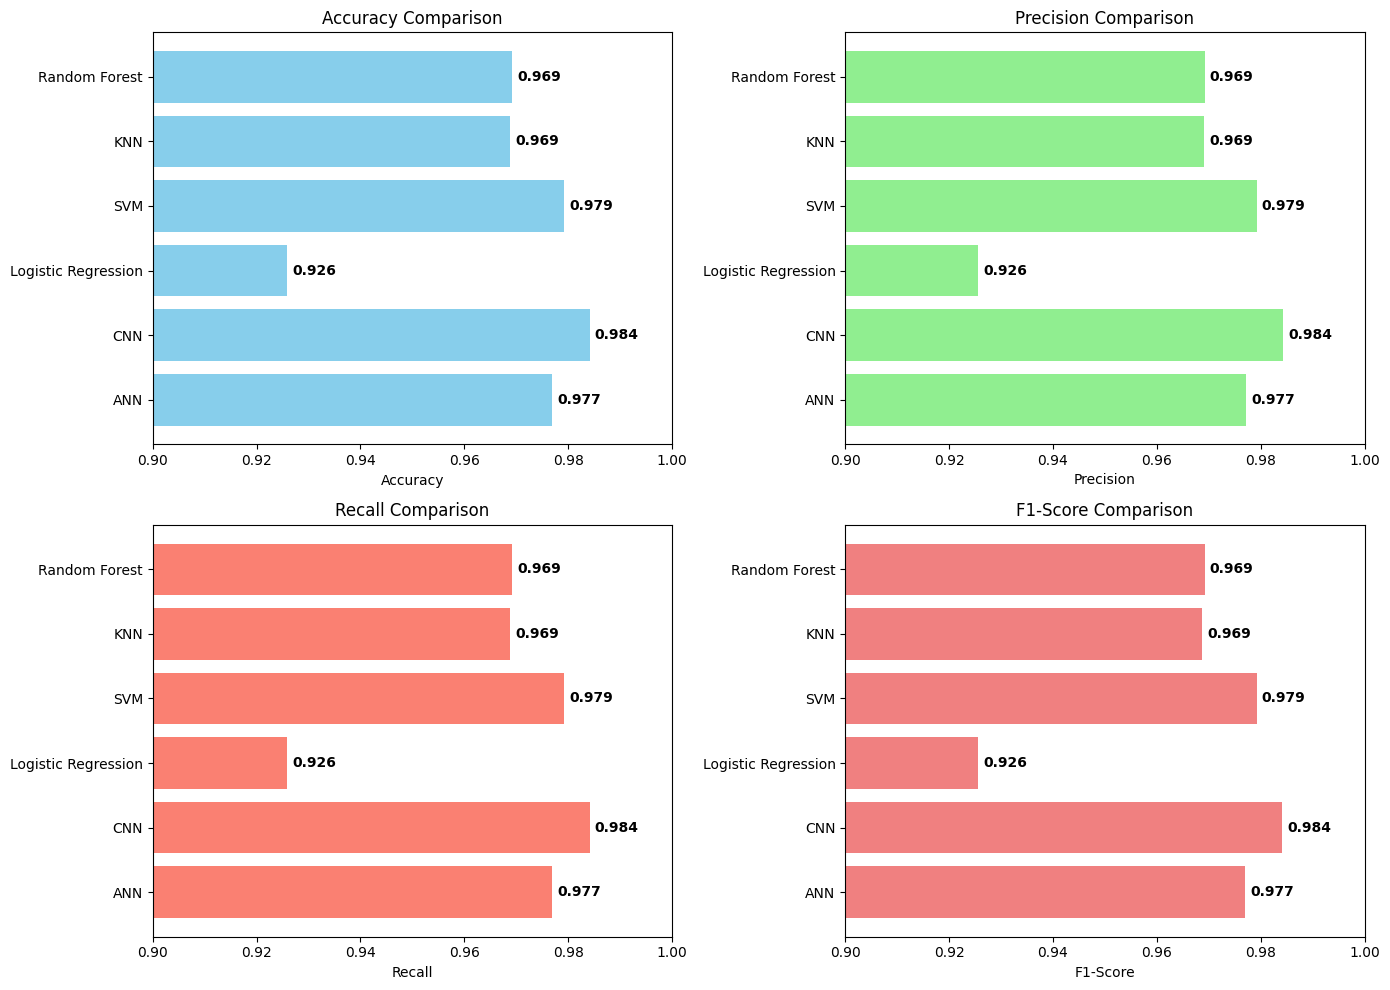

In [16]:
# Extract metrics for visualization
model_names = list(metrics.keys())
accuracy = [metrics[model]['accuracy'] for model in model_names]
precision = [metrics[model]['precision'] for model in model_names]
recall = [metrics[model]['recall'] for model in model_names]
f1 = [metrics[model]['f1'] for model in model_names]

# Create the subplots for accuracy, precision, recall, and F1-score
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Accuracy
axes[0, 0].barh(model_names, accuracy, color='skyblue')
axes[0, 0].set_title('Accuracy Comparison')
axes[0, 0].set_xlabel('Accuracy')
axes[0, 0].set_xlim([0.9, 1.0])  # Zoom into the range for better visualization
for i, v in enumerate(accuracy):
    axes[0, 0].text(v + 0.001, i, f"{v:.3f}", va='center', ha='left', color='black', fontweight='bold')

# Precision
axes[0, 1].barh(model_names, precision, color='lightgreen')
axes[0, 1].set_title('Precision Comparison')
axes[0, 1].set_xlabel('Precision')
axes[0, 1].set_xlim([0.9, 1.0])  # Zoom into the range for better visualization
for i, v in enumerate(precision):
    axes[0, 1].text(v + 0.001, i, f"{v:.3f}", va='center', ha='left', color='black', fontweight='bold')

# Recall
axes[1, 0].barh(model_names, recall, color='salmon')
axes[1, 0].set_title('Recall Comparison')
axes[1, 0].set_xlabel('Recall')
axes[1, 0].set_xlim([0.9, 1.0])  # Zoom into the range for better visualization
for i, v in enumerate(recall):
    axes[1, 0].text(v + 0.001, i, f"{v:.3f}", va='center', ha='left', color='black', fontweight='bold')

# F1-Score
axes[1, 1].barh(model_names, f1, color='lightcoral')
axes[1, 1].set_title('F1-Score Comparison')
axes[1, 1].set_xlabel('F1-Score')
axes[1, 1].set_xlim([0.9, 1.0])  # Zoom into the range for better visualization
for i, v in enumerate(f1):
    axes[1, 1].text(v + 0.001, i, f"{v:.3f}", va='center', ha='left', color='black', fontweight='bold')

# Adjust layout
plt.tight_layout()
plt.show()


In [18]:
training_times

{'ANN': 51.59434509277344,
 'CNN': 361.32869505882263,
 'Logistic Regression': 88.90238857269287,
 'SVM': 318.0640048980713,
 'KNN': 0.08439946174621582,
 'Random Forest': 55.622344970703125}

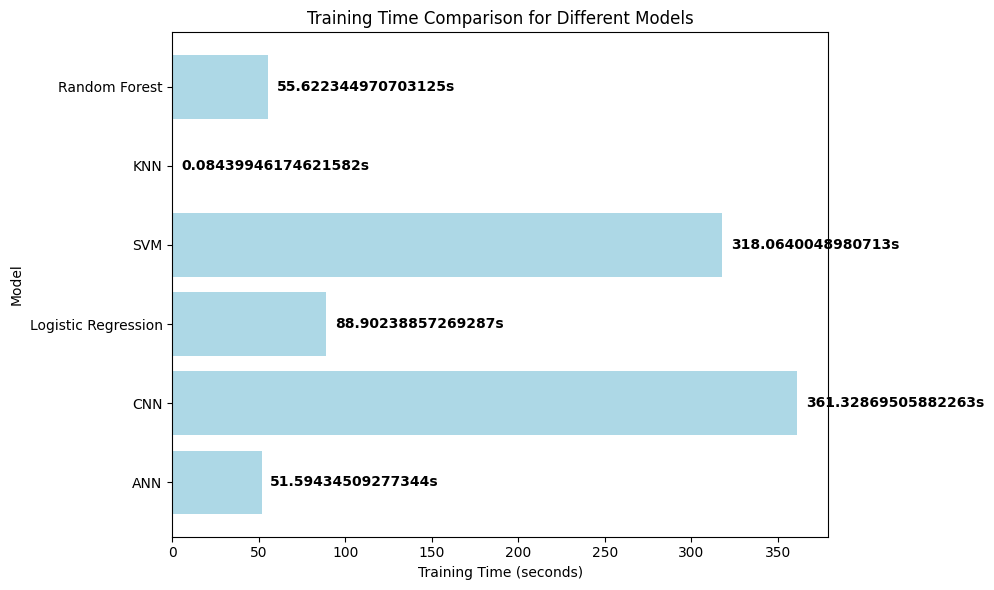

In [17]:
training_times = {
    'ANN': ann_training_time,
    'CNN': cnn_training_time,
    'Logistic Regression': lr_training_time,
    'SVM': svm_training_time,
    'KNN': knn_training_time,
    'Random Forest': rf_training_time,
}

model_names = list(training_times.keys())
times = list(training_times.values())

# Create a bar chart for training time comparison
plt.figure(figsize=(10, 6))
plt.barh(model_names, times, color='lightblue')
plt.title('Training Time Comparison for Different Models')
plt.xlabel('Training Time (seconds)')
plt.ylabel('Model')
for i, v in enumerate(times):
    plt.text(v + 5, i, f"{v}s", va='center', ha='left', color='black', fontweight='bold')
plt.tight_layout()
plt.show()


ANN Model Metrics:
Test Accuracy: 0.9769
Precision: 0.9773
Recall: 0.9769
F1-Score: 0.9769
Confusion Matrix:
[[ 975    0    1    0    1    1    0    2    0    0]
 [   0 1128    3    2    0    1    0    0    1    0]
 [   5    2 1011    7    1    0    0    3    2    1]
 [   0    0    0 1004    0    0    0    1    4    1]
 [   0    1    6    0  958    0    1    3    0   13]
 [   4    1    0   23    1  853    7    0    2    1]
 [   7    3    4    1    8    3  929    0    3    0]
 [   2    2    9   10    2    0    0  987    1   15]
 [   4    0    5   11    4    2    2    1  939    6]
 [   3    2    0   10    6    1    0    1    1  985]]


CNN Model Metrics:
Test Accuracy: 0.9841
Precision: 0.9842
Recall: 0.9841
F1-Score: 0.9841
Confusion Matrix:
[[ 967    2    2    0    1    1    4    1    1    1]
 [   0 1129    0    4    0    2    0    0    0    0]
 [   1    0 1021    1    2    0    0    5    2    0]
 [   0    0    1 1005    0    2    0    0    0    2]
 [   0    0    1    0  961    0    1

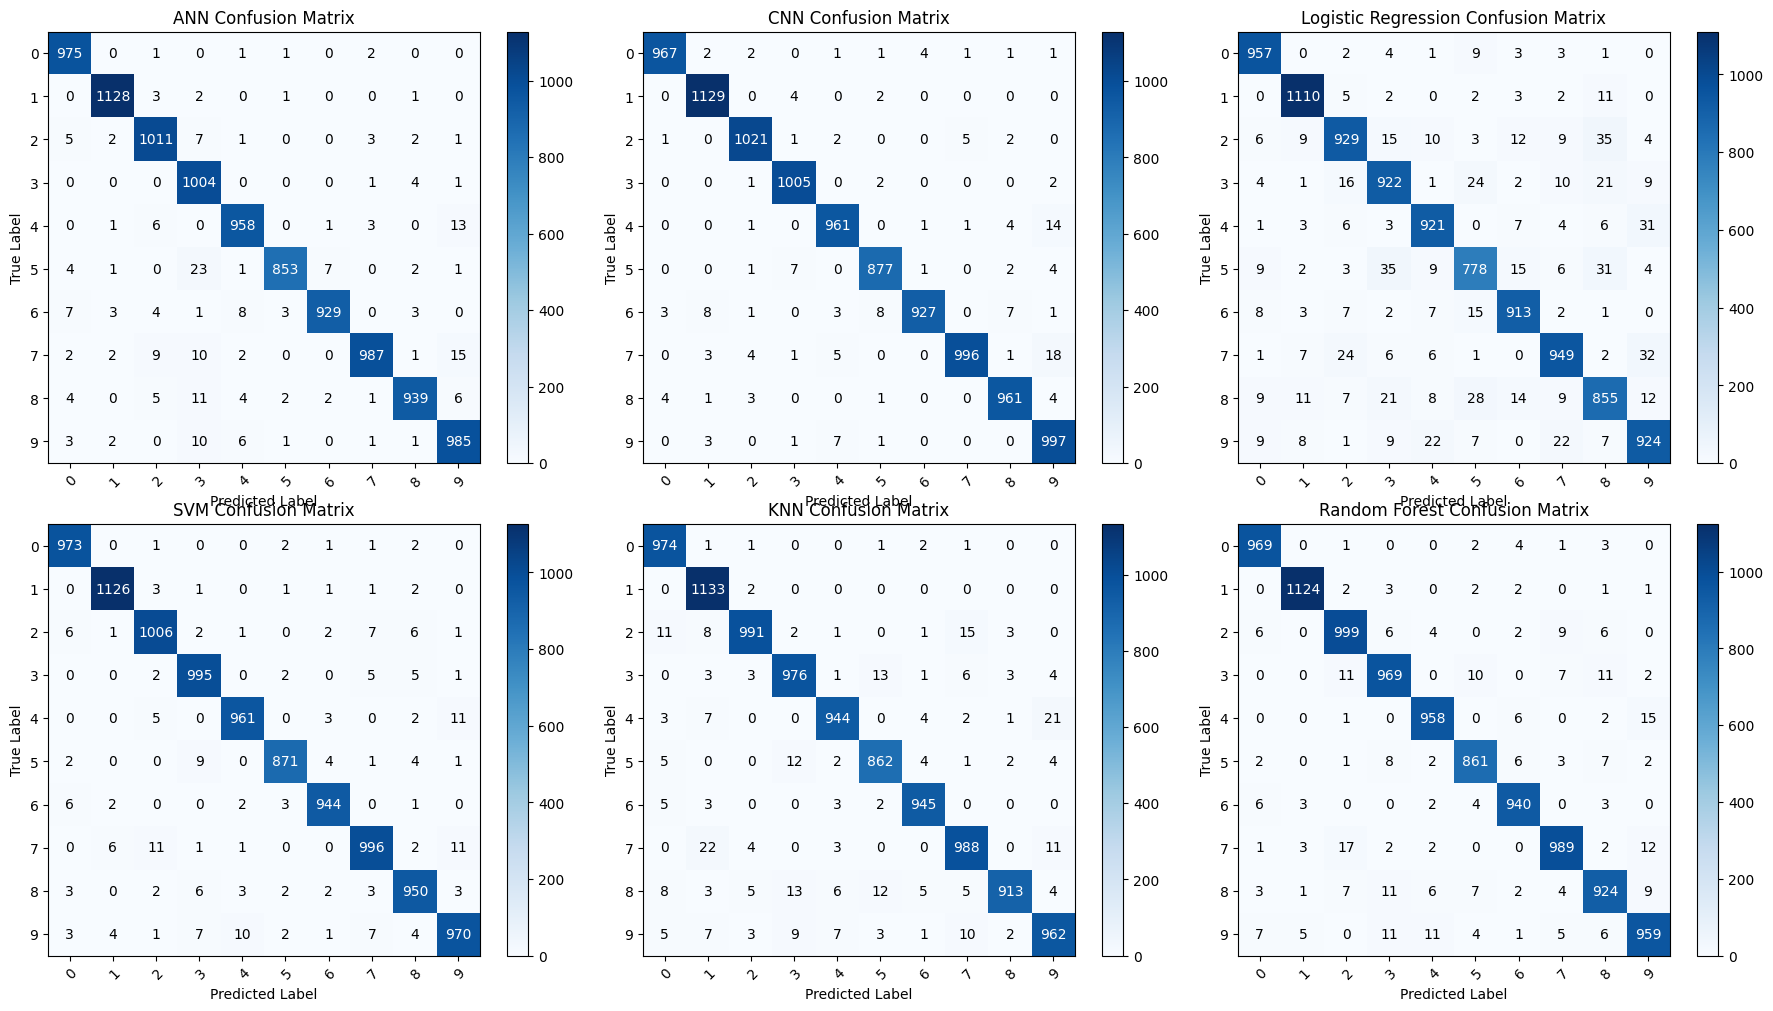

In [9]:
# Print results
for model_name in metrics.keys():
    print(f"\n{model_name} Model Metrics:")
    print(f"Test Accuracy: {metrics[model_name]['accuracy']:.4f}")
    print(f"Precision: {metrics[model_name]['precision']:.4f}")
    print(f"Recall: {metrics[model_name]['recall']:.4f}")
    print(f"F1-Score: {metrics[model_name]['f1']:.4f}")
    print(f"Confusion Matrix:\n{metrics[model_name]['conf_matrix']}\n")

# Visualization of Confusion Matrix (for all models)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for i, model_name in enumerate(metrics.keys()):
    cm = metrics[model_name]['conf_matrix']
    ax = axes[i]
    ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.set_title(f"{model_name} Confusion Matrix")
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    ax.figure.colorbar(ax.images[0], ax=ax)
    ax.set_xticks(np.arange(10))
    ax.set_yticks(np.arange(10))
    ax.set_xticklabels(np.arange(10))
    ax.set_yticklabels(np.arange(10))
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    thresh = cm.max() / 2.
    for i in range(10):
        for j in range(10):
            ax.text(j, i, format(cm[i, j], 'd'),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.show()